In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [ ]:
raw_dataset = pd.read_csv("/content/drive/MyDrive/raw-nairaland-headlines.csv")

# Exploratory Data Analysis

In [ ]:
raw_dataset.head()

,headline,link,category
0,A Total Ban On The Use Of Ethnic Slurs On Nair...,/7631314/total-ban-use-ethnic-slurs,politics
1,UK Court Rejects Ozekhome’s Request To Transfe...,/8519537/uk-court-rejects-ozekhomes-request,politics
2,No Going Back On Biafra – MASSOB Declares Afte...,/8519500/no-going-back-biafra-massob,politics
3,Oseni Rufai Calls Out Double Standards Of Tinu...,/8519558/oseni-rufai-calls-out-double,politics
4,Bandits Openly Display Ammunition During Peace...,/8519473/bandits-openly-display-ammunition-during,politics


In [ ]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5739 entries, 0 to 5738
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  5738 non-null   object
 1   link      5739 non-null   object
 2   category  5739 non-null   object
dtypes: object(3)
memory usage: 134.6+ KB


In [ ]:
category_counts = raw_dataset['category'].value_counts()

In [ ]:
category_counts

,count
category,
politics,1218
sports,1085
business,1011
tv-movies,865
music-radio,856
education,704


In [ ]:
raw_dataset.isna().sum()

,0
headline,1
link,0
category,0


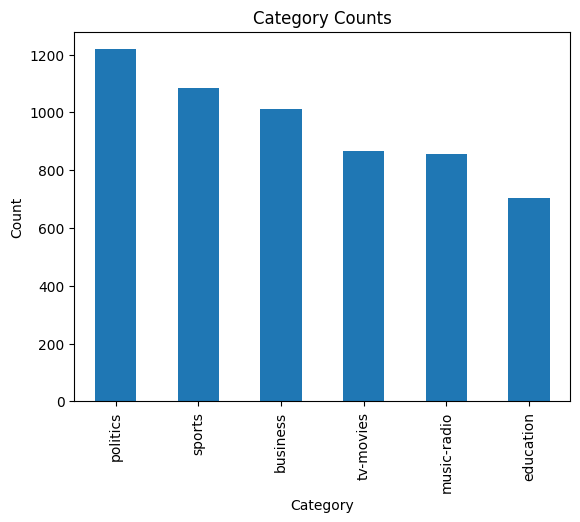

In [ ]:
category_counts.plot(kind='bar', title='Category Counts')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

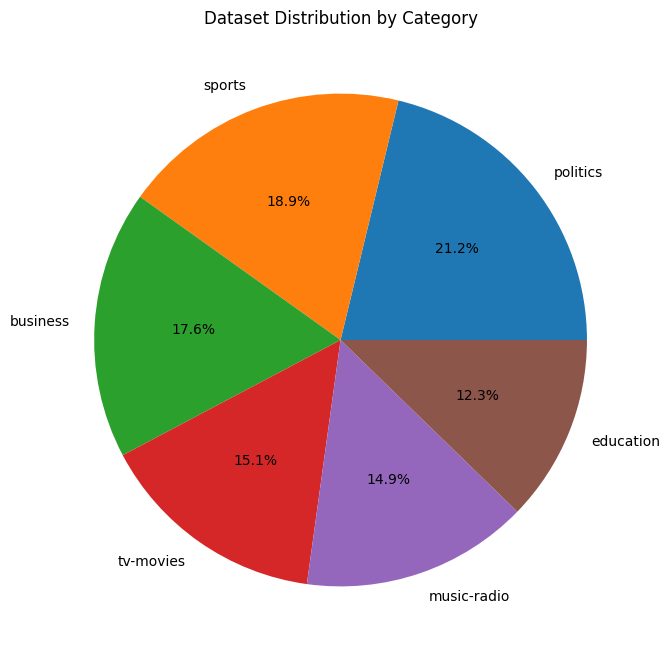

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Dataset Distribution by Category')
plt.show()

## Data Cleaning

In [ ]:
dataset = raw_dataset.copy()

In [ ]:
dataset = dataset.drop("link", axis=1)

Dropping missing headline

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset.isna().sum()

,0
headline,0
category,0


Convering headlines to lowercase

In [ ]:
dataset['headline'] = dataset['headline'].str.lower()

Handling duplicates

In [ ]:
dataset[dataset.duplicated()]

,headline,category
53,court hears nnamdi kanu’s motion seeking his t...,politics
109,sgg strategizes in obosi as okoma vows 130-war...,politics
110,sgg strategizes in obosi as okoma vows 130-war...,politics
180,hon. francis barthlomew chima (omobarca) joins...,politics
191,fresh legal firestorm over nnamdi kanu’s trial...,politics
...,...,...
5405,best inspirational love songs of all time,music-radio
5470,fedozky - godfather (prod. by kaladmagicfinger),music-radio
5485,"how to grow from 0 to 34,000 monthly spotify l...",music-radio
5497,tekno – gon gon,music-radio


In [ ]:
dataset = dataset.drop_duplicates()

In [ ]:
def get_headline(headline):
  # Check if any of the specified punctuation marks are in the headline
  if any(char in headline for char in ['.', '?', ';', ':', ',']):
    return headline
  else:
    return None

In [ ]:
dataset[dataset['headline'].apply(get_headline).notna()]['headline'].loc[7]

'debt scandal: ukachukwu held hostage over ₦1billion (video)'

In [ ]:
dataset[dataset['headline'].apply(get_headline).notna()]['headline'].loc[8]

'which party is giringori in?'

From the headline above it is clear that "?, :" can be a signal in the headlines therefore i didn't strip it off headlines

In [ ]:
dataset['headline'] = dataset['headline'].str.strip(".,;:")

Handling empty strings as headlines

In [ ]:
dataset[dataset['headline'].str.isspace()]

,headline,category


Checking for headlines with length below a certain value
- the exploration below showed that some headlines like "audiomark", "hip hop" can be real signals and those with the length below 7 are noise

In [ ]:
dataset['headline_length'] = dataset['headline'].apply(lambda x: len(x))

In [ ]:
dataset[dataset['headline_length'] < 10]

,headline,category,headline_length
849,@,politics,1
1371,deriv bot,business,9
1444,my story,business,8
1720,,business,0
1740,cbn push,business,9
1819,closed,business,6
1833,business,business,8
2419,it issues,education,9
2469,education,education,9
2849,nursing,education,7


In [ ]:
dataset[dataset['headline_length'] <= 7]

,headline,category,headline_length
849,@,politics,1
1720,,business,0
1819,closed,business,6
2849,nursing,education,7
3018,mostbet,sports,7
3158,grownow,sports,7
3502,hi,sports,2
3552,fc news,sports,7
4040,,tv-movies,0
4348,mankind,tv-movies,7


In [ ]:
dataset = dataset[dataset['headline_length'] >= 7]

In [ ]:
cleaned_dataset = dataset.drop("headline_length", axis=1)

In [ ]:
cleaned_dataset = cleaned_dataset.reset_index(drop=True)

In [ ]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5652 entries, 0 to 5651
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  5652 non-null   object
 1   category  5652 non-null   object
dtypes: object(2)
memory usage: 88.4+ KB


# Futher Exploration

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [ ]:
cleaned_dataset['category'].unique()

array(['politics', 'business', 'education', 'sports', 'tv-movies',
       'music-radio'], dtype=object)

Word frequency analysis per category before applying max_df and min_df

In [ ]:
test_dataset = cleaned_dataset.copy()

In [ ]:
# Top 20 words per category
for category in test_dataset['category'].unique():
  matrix = cv.fit_transform(test_dataset[test_dataset['category']==category]['headline'])
  freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
  # sort from largest to smallest
  print(f"Top 20 words used for {category} category")
  print(sorted(freqs, key=lambda x: -x[1])[:20])
  print("\n")

Top 20 words used for politics category
[('tinubu', 166), ('nigeria', 112), ('obi', 75), ('state', 66), ('lagos', 56), ('2027', 48), ('adc', 47), ('anambra', 45), ('nigerians', 44), ('peter', 43), ('police', 41), ('apc', 40), ('video', 37), ('nigerian', 36), ('governor', 35), ('el', 34), ('rufai', 33), ('jonathan', 32), ('sowore', 32), ('president', 31)]


Top 20 words used for business category
[('nigeria', 107), ('business', 103), ('sale', 44), ('new', 34), ('2025', 31), ('design', 29), ('money', 27), ('available', 26), ('online', 26), ('services', 26), ('guide', 24), ('eunice', 23), ('08029562694', 21), ('website', 21), ('10', 20), ('ai', 20), ('dangote', 20), ('market', 20), ('naira', 20), ('need', 20)]


Top 20 words used for education category
[('2025', 82), ('university', 65), ('2026', 47), ('school', 38), ('students', 36), ('nigerian', 34), ('admission', 31), ('education', 31), ('nigeria', 29), ('student', 25), ('new', 24), ('study', 23), ('utme', 23), ('jamb', 22), ('waec', 22

In [ ]:
# Top 20 less used words per category
for category in test_dataset['category'].unique():
  matrix = cv.fit_transform(test_dataset[test_dataset['category']==category]['headline'])
  freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
  # sort from smallest to largest
  print(f"Bottom 20 words used for {category} category")
  print(sorted(freqs, key=lambda x: x[1])[:20])
  print("\n")

Bottom 20 words used for politics category
[('1000', 1), ('102', 1), ('10bscf', 1), ('11', 1), ('12hrs', 1), ('12th', 1), ('13', 1), ('130', 1), ('140', 1), ('150', 1), ('1500', 1), ('155', 1), ('17', 1), ('19', 1), ('1960s', 1), ('1996', 1), ('1billion', 1), ('1m', 1), ('2010', 1), ('2014', 1)]


Bottom 20 words used for business category
[('000mah', 1), ('00pm', 1), ('08029563694', 1), ('08112676222', 1), ('08148578730', 1), ('09041471516', 1), ('1000', 1), ('100ft', 1), ('100k', 1), ('10kva', 1), ('11th', 1), ('12', 1), ('122', 1), ('128', 1), ('128gb', 1), ('12gb', 1), ('150', 1), ('150m', 1), ('15k', 1), ('15sep25', 1)]


Bottom 20 words used for education category
[('08', 1), ('10m', 1), ('12', 1), ('120', 1), ('15', 1), ('150', 1), ('16', 1), ('16yr', 1), ('17', 1), ('172', 1), ('18', 1), ('1983', 1), ('2002', 1), ('2017', 1), ('21', 1), ('239', 1), ('25', 1), ('251', 1), ('26', 1), ('28', 1)]


Bottom 20 words used for sports category
[('0000', 1), ('02', 1), ('08', 1), ('0s2z1

Word frequency analysis after applying max and min df

In [ ]:
cv = CountVectorizer(stop_words='english', max_df=0.8, min_df=0.01)

In [ ]:
# Top 20 words per category
for category in test_dataset['category'].unique():
  matrix = cv.fit_transform(test_dataset[test_dataset['category']==category]['headline'])
  freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
  # sort from largest to smallest
  print(f"Top 20 words used for {category} category")
  print(sorted(freqs, key=lambda x: -x[1])[:20])
  print("\n")

Top 20 words used for politics category
[('tinubu', 166), ('nigeria', 112), ('obi', 75), ('state', 66), ('lagos', 56), ('2027', 48), ('adc', 47), ('anambra', 45), ('nigerians', 44), ('peter', 43), ('police', 41), ('apc', 40), ('video', 37), ('nigerian', 36), ('governor', 35), ('el', 34), ('rufai', 33), ('jonathan', 32), ('sowore', 32), ('president', 31)]


Top 20 words used for business category
[('nigeria', 107), ('business', 103), ('sale', 44), ('new', 34), ('2025', 31), ('design', 29), ('money', 27), ('available', 26), ('online', 26), ('services', 26), ('guide', 24), ('eunice', 23), ('08029562694', 21), ('website', 21), ('10', 20), ('ai', 20), ('dangote', 20), ('market', 20), ('naira', 20), ('need', 20)]


Top 20 words used for education category
[('2025', 82), ('university', 65), ('2026', 47), ('school', 38), ('students', 36), ('nigerian', 34), ('admission', 31), ('education', 31), ('nigeria', 29), ('student', 25), ('new', 24), ('study', 23), ('utme', 23), ('jamb', 22), ('waec', 22

In [ ]:
# Top 20 less used words per category
for category in test_dataset['category'].unique():
  matrix = cv.fit_transform(test_dataset[test_dataset['category']==category]['headline'])
  freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
  # sort from smallest to largest
  print(f"Bottom 20 words used for {category} category")
  print(sorted(freqs, key=lambda x: x[1])[:20])
  print("\n")

Bottom 20 words used for politics category
[('chairman', 12), ('chief', 12), ('dangote', 12), ('end', 12), ('enugu', 12), ('nupeng', 12), ('omokri', 12), ('support', 12), ('yoruba', 12), ('apga', 13), ('blasts', 13), ('million', 13), ('party', 13), ('people', 13), ('politics', 13), ('senate', 13), ('breaking', 14), ('ex', 14), ('group', 14), ('minister', 14)]


Bottom 20 words used for business category
[('building', 10), ('don', 10), ('dr', 10), ('gift', 10), ('service', 10), ('skills', 10), ('cost', 11), ('dollar', 11), ('know', 11), ('let', 11), ('loan', 11), ('professional', 11), ('trade', 11), ('card', 12), ('help', 12), ('home', 12), ('investment', 12), ('prices', 12), ('000', 13), ('account', 13)]


Bottom 20 words used for education category
[('canada', 7), ('countries', 7), ('course', 7), ('day', 7), ('degree', 7), ('digital', 7), ('download', 7), ('english', 7), ('future', 7), ('medical', 7), ('open', 7), ('photos', 7), ('primary', 7), ('private', 7), ('pupils', 7), ('seconda

Afte using max_df and min_df in the TdifVectoriser and training the model with vectorised train sets, I discovered that the dataset lost important signals from the filtering making accuracy and precision drop drastically to below 0.5 each. You can try that with

vectoriser = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=0.01)

# Spliting the dataset

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

In [ ]:
X = cleaned_dataset['headline']

In [ ]:
y = cleaned_dataset['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Modelling and Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, f1_score

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn. preprocessing import LabelEncoder

In [ ]:
vectoriser = TfidfVectorizer(stop_words='english', max_df=0.9, min_df=0.001)

In [ ]:
X_train = vectoriser.fit_transform(X_train)

In [ ]:
X_test = vectoriser.transform(X_test)

In [ ]:
le = LabelEncoder()

In [ ]:
y_train_encoded = le.fit_transform(y_train)

In [ ]:
y_test_encoded = le.transform(y_test)

In [ ]:
def evaluate_model(model):
  model.fit(X_train, y_train_encoded)
  y_pred = model.predict(X_test)

  accuracy = round(accuracy_score(y_test_encoded, y_pred),2)
  f1_score_ = round(f1_score(y_test_encoded, y_pred, average='weighted'),2)

  print(model)
  print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

  plt.figure(figsize=(12,10))
  ConfusionMatrixDisplay.from_predictions(y_test_encoded, y_pred, display_labels=le.classes_)
  plt.xticks(rotation=90)
  plt.show()
  print(f"Accuracy: {accuracy}")
  print(f"F1 Score: {f1_score_}")

using logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Base logistic regression
base_log = LogisticRegression(class_weight="balanced")

LogisticRegression(class_weight='balanced')
              precision    recall  f1-score   support

    business       0.60      0.69      0.64       209
   education       0.72      0.72      0.72       134
 music-radio       0.90      0.75      0.82       174
    politics       0.71      0.80      0.76       234
      sports       0.91      0.78      0.84       227
   tv-movies       0.70      0.69      0.70       153

    accuracy                           0.74      1131
   macro avg       0.76      0.74      0.74      1131
weighted avg       0.76      0.74      0.75      1131



<Figure size 1200x1000 with 0 Axes>

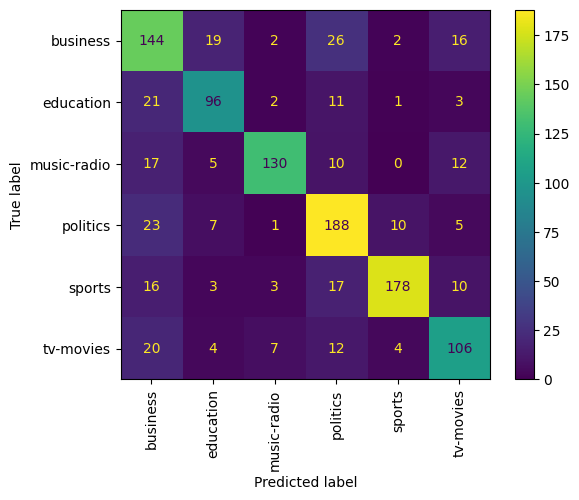

Accuracy: 0.74
F1 Score: 0.75


In [ ]:
evaluate_model(base_log)

In [ ]:
# Logistic regression cv
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)

In [ ]:
log_model = LogisticRegressionCV(cv=cv, Cs=10, class_weight="balanced", scoring='f1_weighted')

LogisticRegressionCV(class_weight='balanced',
                     cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
                     scoring='f1_weighted')
              precision    recall  f1-score   support

    business       0.58      0.69      0.63       209
   education       0.70      0.71      0.70       134
 music-radio       0.88      0.74      0.80       174
    politics       0.74      0.80      0.77       234
      sports       0.92      0.79      0.85       227
   tv-movies       0.68      0.68      0.68       153

    accuracy                           0.74      1131
   macro avg       0.75      0.74      0.74      1131
weighted avg       0.76      0.74      0.75      1131



<Figure size 1200x1000 with 0 Axes>

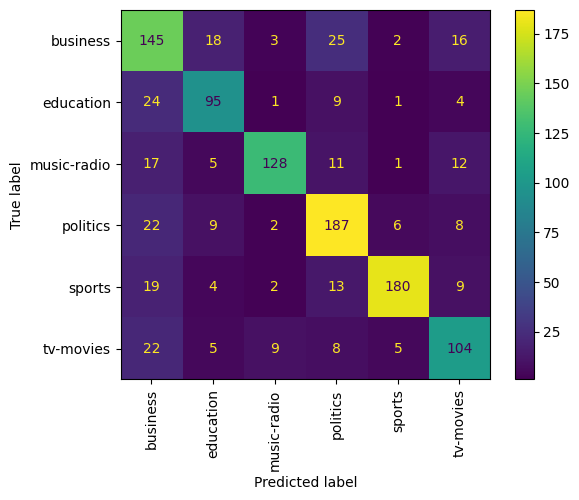

Accuracy: 0.74
F1 Score: 0.75


In [ ]:
evaluate_model(log_model)

Using KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
base_knn = KNeighborsClassifier()

KNeighborsClassifier()
              precision    recall  f1-score   support

    business       0.33      0.71      0.45       209
   education       0.69      0.30      0.42       134
 music-radio       0.58      0.67      0.62       174
    politics       0.67      0.32      0.44       234
      sports       0.88      0.36      0.51       227
   tv-movies       0.41      0.57      0.47       153

    accuracy                           0.49      1131
   macro avg       0.59      0.49      0.48      1131
weighted avg       0.60      0.49      0.48      1131



<Figure size 1200x1000 with 0 Axes>

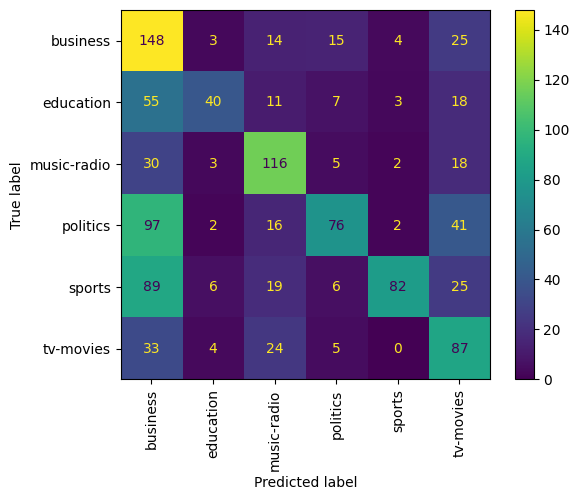

Accuracy: 0.49
F1 Score: 0.48


In [ ]:
evaluate_model(base_knn)

In [ ]:
base_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# KNN CV
param_grid = {
    'n_neighbors': range(1, 21),
}

In [ ]:
knn_grid = GridSearchCV(base_knn, param_grid, cv=cv, scoring='f1_weighted')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 21)}, scoring='f1_weighted')
              precision    recall  f1-score   support

    business       0.38      0.51      0.44       209
   education       0.57      0.43      0.49       134
 music-radio       0.67      0.64      0.66       174
    politics       0.59      0.53      0.55       234
      sports       0.73      0.55      0.62       227
   tv-movies       0.44      0.57      0.49       153

    accuracy                           0.54      1131
   macro avg       0.56      0.54      0.54      1131
weighted avg       0.57      0.54      0.55      1131



<Figure size 1200x1000 with 0 Axes>

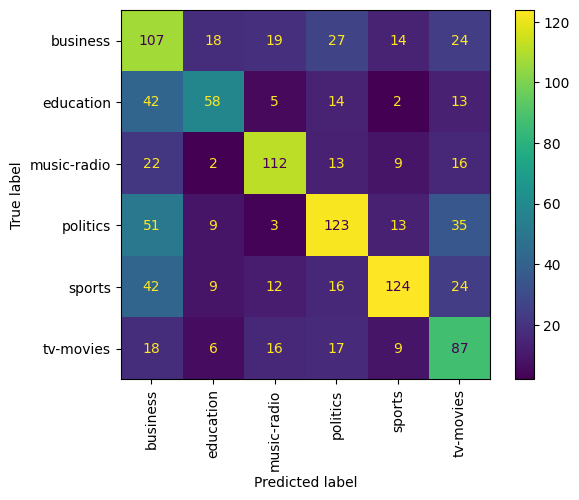

Accuracy: 0.54
F1 Score: 0.55


In [ ]:
evaluate_model(knn_grid)

In [ ]:
knn_grid.best_params_

{'n_neighbors': 1}

using SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
base_svc = SVC(class_weight="balanced")

SVC(class_weight='balanced')
              precision    recall  f1-score   support

    business       0.66      0.68      0.67       209
   education       0.76      0.68      0.72       134
 music-radio       0.90      0.72      0.80       174
    politics       0.68      0.83      0.75       234
      sports       0.93      0.80      0.86       227
   tv-movies       0.61      0.70      0.65       153

    accuracy                           0.74      1131
   macro avg       0.76      0.74      0.74      1131
weighted avg       0.76      0.74      0.75      1131



<Figure size 1200x1000 with 0 Axes>

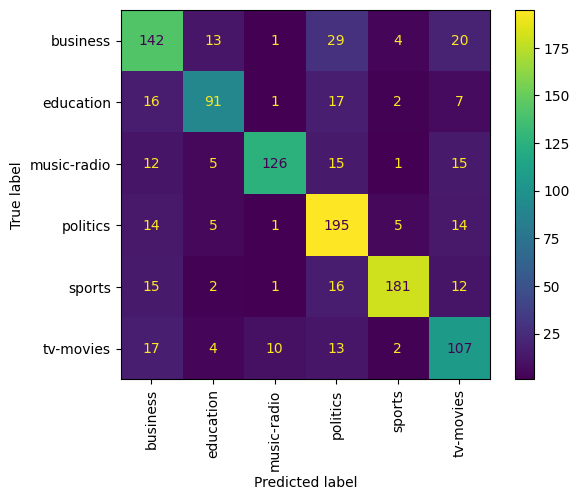

Accuracy: 0.74
F1 Score: 0.75


In [ ]:
evaluate_model(base_svc)

In [ ]:
# Cross validation with svc
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

In [ ]:
svc_grid = GridSearchCV(base_svc, param_grid, cv=cv, scoring='f1_weighted')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='f1_weighted')
              precision    recall  f1-score   support

    business       0.66      0.68      0.67       209
   education       0.75      0.68      0.71       134
 music-radio       0.90      0.72      0.80       174
    politics       0.69      0.83      0.75       234
      sports       0.92      0.80      0.86       227
   tv-movies       0.61      0.70      0.65       153

    accuracy                           0.74      1131
   macro avg       0.76      0.74      0.74      1131
weighted avg       0.76      0.74      0.75      1131



<Figure size 1200x1000 with 0 Axes>

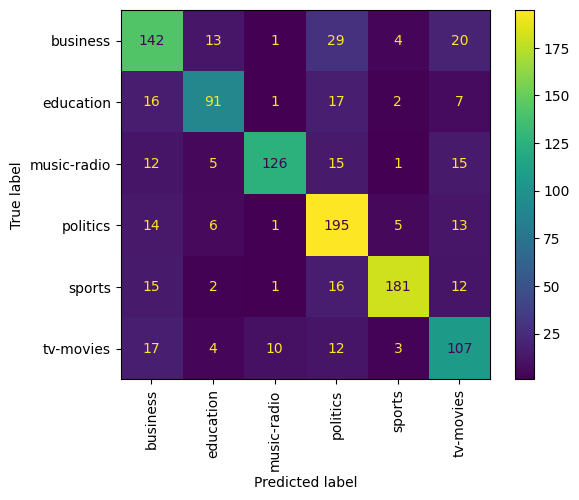

Accuracy: 0.74
F1 Score: 0.75


In [339]:
evaluate_model(svc_grid)

In [340]:
svc_grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [341]:
# Linear SVC
from sklearn.svm import LinearSVC

In [342]:
linear_svc = LinearSVC(class_weight="balanced")

LinearSVC(class_weight='balanced')
              precision    recall  f1-score   support

    business       0.58      0.64      0.61       209
   education       0.64      0.67      0.65       134
 music-radio       0.89      0.75      0.82       174
    politics       0.71      0.78      0.74       234
      sports       0.89      0.80      0.84       227
   tv-movies       0.69      0.67      0.68       153

    accuracy                           0.73      1131
   macro avg       0.73      0.72      0.72      1131
weighted avg       0.74      0.73      0.73      1131



<Figure size 1200x1000 with 0 Axes>

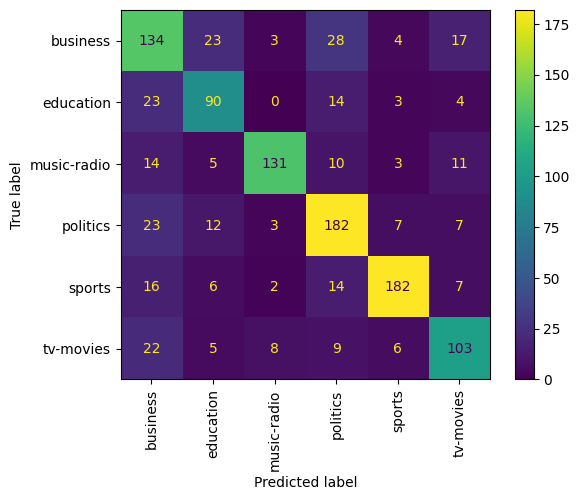

Accuracy: 0.73
F1 Score: 0.73


In [343]:
evaluate_model(linear_svc)

using naive bayes

In [344]:
from sklearn.naive_bayes import MultinomialNB

In [345]:
nvb = MultinomialNB()

MultinomialNB()
              precision    recall  f1-score   support

    business       0.69      0.68      0.69       209
   education       0.90      0.60      0.72       134
 music-radio       0.90      0.77      0.83       174
    politics       0.62      0.85      0.72       234
      sports       0.85      0.81      0.83       227
   tv-movies       0.69      0.67      0.68       153

    accuracy                           0.75      1131
   macro avg       0.78      0.73      0.74      1131
weighted avg       0.77      0.75      0.75      1131



<Figure size 1200x1000 with 0 Axes>

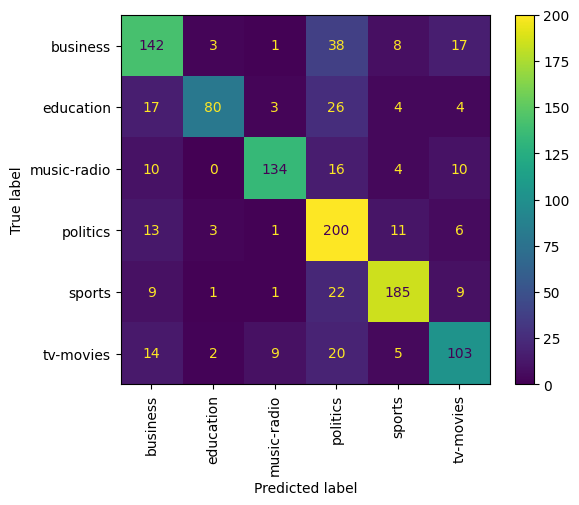

Accuracy: 0.75
F1 Score: 0.75


In [346]:
evaluate_model(nvb)

using random forest classifier

In [347]:
from sklearn.ensemble import RandomForestClassifier

In [348]:
rfc = RandomForestClassifier(class_weight="balanced")

RandomForestClassifier(class_weight='balanced')
              precision    recall  f1-score   support

    business       0.64      0.61      0.63       209
   education       0.76      0.63      0.69       134
 music-radio       0.80      0.75      0.77       174
    politics       0.72      0.81      0.76       234
      sports       0.89      0.79      0.84       227
   tv-movies       0.60      0.75      0.67       153

    accuracy                           0.73      1131
   macro avg       0.73      0.72      0.73      1131
weighted avg       0.74      0.73      0.73      1131



<Figure size 1200x1000 with 0 Axes>

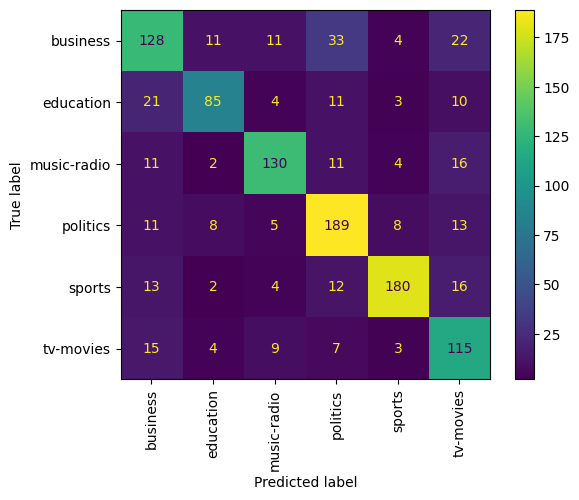

Accuracy: 0.73
F1 Score: 0.73


In [349]:
evaluate_model(rfc)

In [350]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [351]:
rfc_grid = GridSearchCV(rfc, param_grid, cv=cv, scoring='f1_weighted')

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=101, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='f1_weighted')
              precision    recall  f1-score   support

    business       0.66      0.62      0.64       209
   education       0.73      0.66      0.69       134
 music-radio       0.82      0.76      0.79       174
    politics       0.72      0.80      0.76       234
      sports       0.90      0.79      0.84       227
   tv-movies       0.59      0.74      0.66       153

    accuracy                           0.73      1131
   macro avg       0.74      0.73      0.73      1131
weighted avg       0.74      0.73      0.74      1131



<Figure size 1200x1000 with 0 Axes>

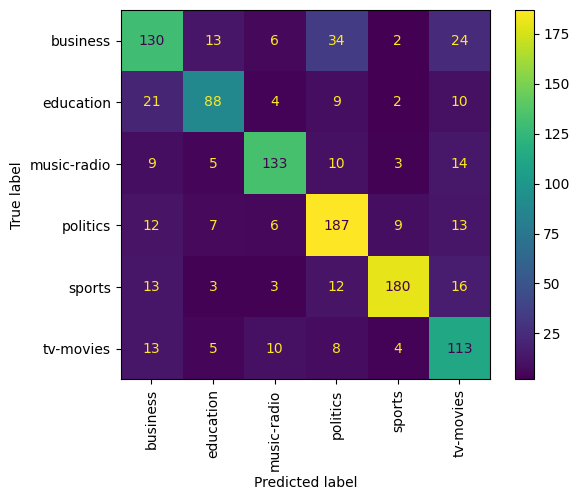

Accuracy: 0.73
F1 Score: 0.74


In [352]:
evaluate_model(rfc_grid)

using gradient boosting

In [353]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
evaluate_model(gbc)

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
}

In [ ]:
# cross  validation with gradient boosting
gbc_grid = GridSearchCV(gbc, param_grid, cv=cv, scoring='f1_weighted')

In [ ]:
evaluate_model(gbc_grid)

Using XGB

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
evaluate_model(xgb)

In [ ]:
models = {
    "Base log": base_log,
    "Log CV": log_model,
    "Base KNN": base_knn,
    "KNN CV": knn_grid,
    "Base SVC": base_svc,
    "SVC CV": svc_grid,
    "Linear SVC": linear_svc,
    "NVB": nvb,
    "RFC": rfc,
    "RFC CV": rfc_grid,
    "GBC": gbc,
    "GBC CV": gbc_grid,
    "XGB": xgb
}

In [ ]:
model_names = []
accuracy_scores = []
micro_f1_scores = []
macro_f1_scores = []
weighted_f1_scores = []

def evaluate_models(model_name, model):
    y_pred = model.predict(X_test)

    model_names.append(model_names)

    accuracy_score_ = accuracy_score(y_test_encoded, y_pred)
    accuracy_scores.append(accuracy_score_)

    micro_f1 = f1_score(y_test_encoded, y_pred, average='micro')
    micro_f1_scores.append(micro_f1)

    macro_f1 = f1_score(y_test_encoded, y_pred, average='macro')
    macro_f1_scores.append(macro_f1)

    weighted_f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    weighted_f1_scores.append(weighted_f1)

In [ ]:
for model_name, model in models.items():
  evaluate_models(model_name, model)

In [ ]:
model_comparison = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracy_scores,
    "Micro F1": micro_f1_scores,
    "Macro F1": macro_f1_scores,
    "Weighted F1": weighted_f1_scores
    })

In [ ]:
model_comparison

In [ ]:
final_model = nvb

In [ ]:
X_train_final = vectoriser.fit_transform(X)

In [ ]:
y_train_final = y

In [ ]:
final_model.fit(X_train_final, y_train_final)

Saving the model

In [ ]:
import joblib

In [ ]:
joblib.dump(final_model, "final_model.joblib")

In [ ]:
joblib.dump(vectoriser, "vectoriser.joblib")

In [ ]:
from google.colab import files

In [ ]:
files.download("final_model.joblib")

In [ ]:
files.download("vectoriser.joblib")